In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as se

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [3]:
mode1=np.polyfit(x,y,1)

In [4]:
mode1

array([ 0.64383562, 26.78082192])

In [6]:
predict=np.poly1d(mode1)

In [7]:
predict(65)

68.63013698630135

In [8]:
y_pred=predict(x)

In [10]:
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y,y_pred)

0.4803218090889323

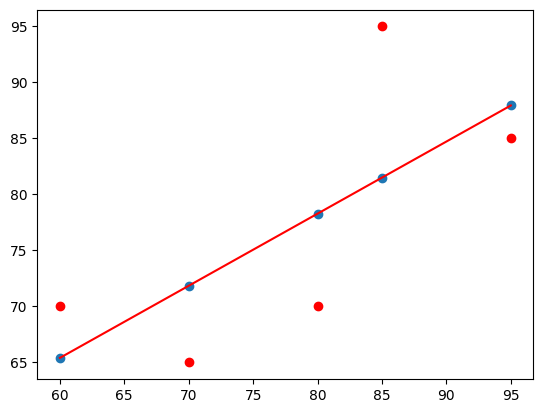

In [14]:
y_line=mode1[1]+mode1[0]*x
plt.plot(x,y_line,c='r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')
plt.show()

In [15]:
data=pd.read_csv("Boston.csv")

In [16]:
data.head(9)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [17]:
data['crim']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64

In [19]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [21]:
x=data.drop(['crim'],axis=1)
y=data['crim']

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [27]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

In [28]:
data=(ytrain_pred,ytrain)
data=(ytest_pred,ytest)

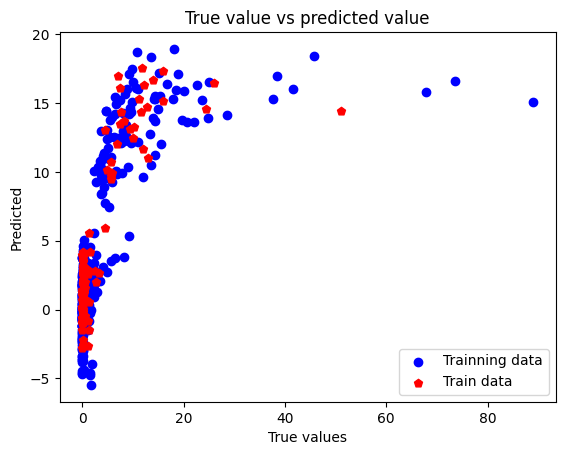

In [29]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Trainning data')
plt.scatter(ytest,ytest_pred,c='red',marker='p',label='Train data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs predicted value")
plt.legend(loc='lower right')
plt.plot()
plt.show()